# Exercici 1

**Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
allow_remote_access=True

In [3]:
wine = pd.read_csv("wineData.txt", header=None)

wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:

winenames = open("wineNames.txt")
print(winenames.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

Posem nom a les columnes:

In [5]:

wine.columns=['Cultivar',' Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',' Magnesium','Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'  ]

In [6]:
wine.head()

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cultivar                      178 non-null    int64  
 1    Alcohol                      178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5    Magnesium                    178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

Com podem veure tenim 178 entrades. Com sabem per la descripció de les dades de l'UCI, tenim 13 atributs numèrics i un atribut de tipus "objecte" (que és la columna objectiu: 'Cultivar'). Totes les columnes de totes les files tenen dades, per tant veiem "178 no nul" al costat de la descripció de cada columna.

In [8]:
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivar,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [9]:
corr=wine.corr()
corr

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Cultivar,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


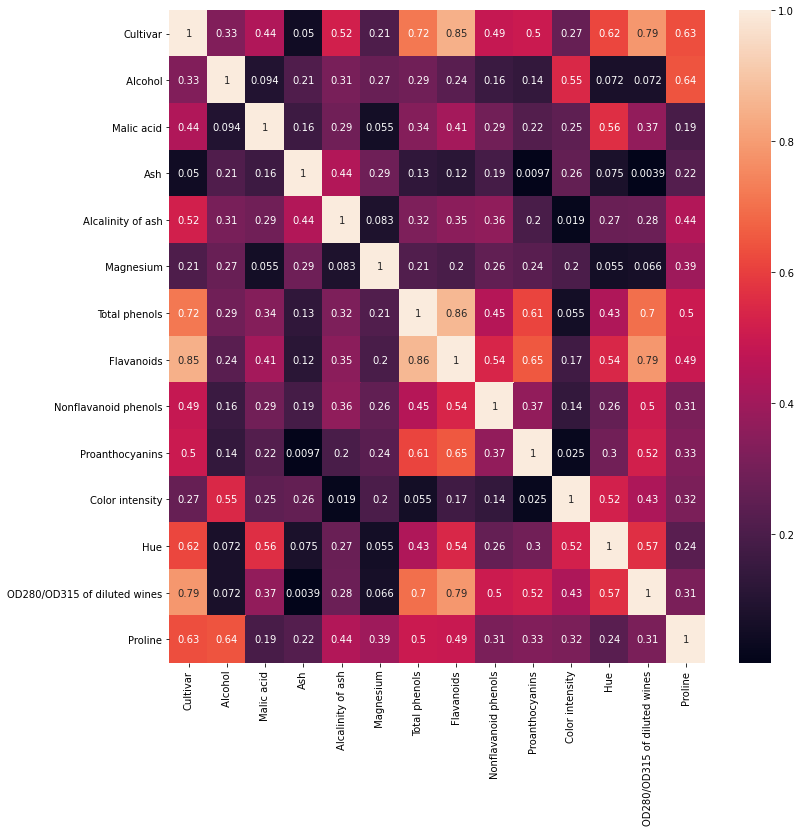

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(corr.abs(), annot=True);

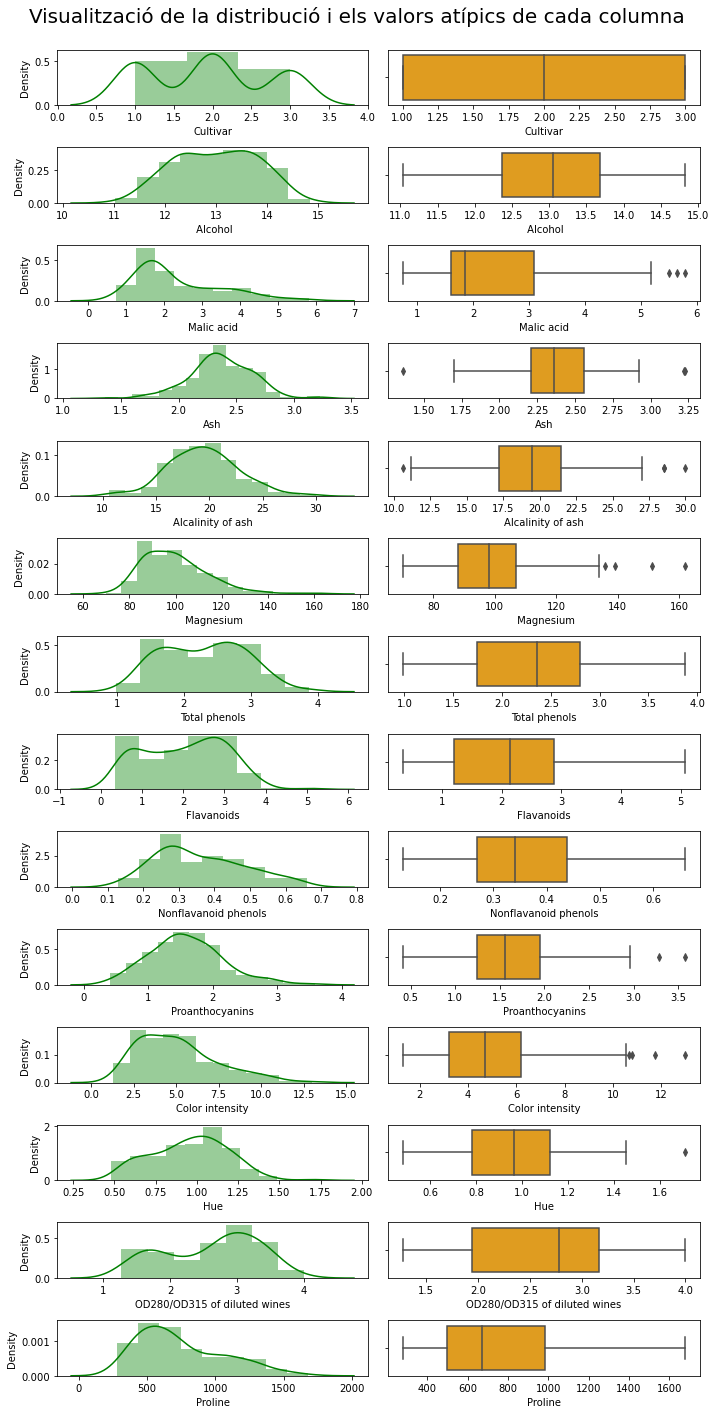

In [11]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(14,2,figsize=(10,20))
for index,i in enumerate(wine.columns):
    sns.distplot(wine[i],ax=ax[index,0],color='green')
    sns.boxplot(wine[i],ax=ax[index,1],color='orange')
    #stats.probplot(wine[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualització de la distribució i els valors atípics de cada columna",fontsize=20);


Definim la target, que en aquest cas es 'Cultivar':

In [12]:
y = wine['Cultivar'].copy()
y.shape

(178,)

In [13]:
y.nunique()

3

Veiem que la nostra variable target té 3 valors, en aquest cas,3 'cultivars' diferents.

* Distribucions variables

És important saber si el conjunt de dades conté mostres suficients de cada cultivar. Si un cultivar té poques mostres, seria difícil utilitzar arbres de decisió per fer una classificació eficaç:

In [14]:
wine['Cultivar'].value_counts()

2    71
1    59
3    48
Name: Cultivar, dtype: int64

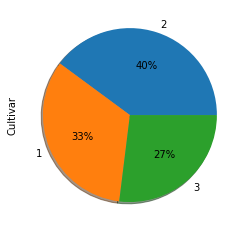

In [15]:
cultivars = wine['Cultivar'].value_counts()
explode = (0, 0.1, 0)
cultivars.plot(kind='pie',autopct='%.0f%%', shadow=True, figsize=(4,4), radius=1.0);

Els valors estan molt repartits entre els 3 cultivars

In [16]:
X = wine.drop(['Cultivar'], axis = 1)
X.shape

(178, 13)


**Divisió del Dataset en Train i Test.**

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0, shuffle=True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(124, 13) (54, 13) (124,) (54,)


* Mètodes de recerca

Analitzarem els atributs del conjunt de dades i crearem un classificador que mapeï les característiques químiques a les varietats. El model de classificador s'entrenarà amb al voltant del 70% de les dades disponibles, i després es provarà el rendiment amb el saldo del 30%. El classificador serà un arbre de decisió.


**Model Decisió Tree Classifier.**

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)
dt_classifier.score(X_test, y_test)

0.9444444444444444

* Anàlisi de classificació

Els resultats de les proves del classificador de l'arbre de decisió indiquen una precisió d'aproximadament el 94%. Aquest és un molt bon resultat, sobretot tenint en compte que no s'ha implementat cap enginyeria de funcions.

In [19]:
y_pred_DT = dt_classifier.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           1       1.00      0.89      0.94        19
           2       0.91      0.95      0.93        22
           3       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



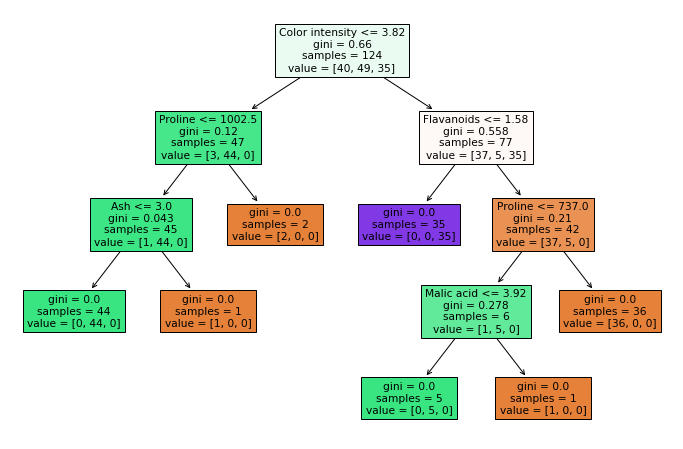

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(decision_tree = dt_classifier, feature_names = X.columns, filled = True);


**Model Nearest Neighbor Classifier.**

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)

0.7222222222222222


- Anàlisi de classificació:

Els resultats de les proves del classificador del Model Nearest Neighbor Classifier  indiquen una precisió d'aproximadament el 72%. Aquest és un resultat millorable.


In [23]:
y_pred_KNN = knn_classifier.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           1       0.80      0.84      0.82        19
           2       0.77      0.77      0.77        22
           3       0.50      0.46      0.48        13

    accuracy                           0.72        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.72      0.72      0.72        54



# Exercici 2
* Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

**Accuracy**

La accuracy (precisió) es defineix com:

Fracció de prediccions correctes: prediccions correctes / nombre total de punts de dades

La predicció més baixa és 0 i la més alta 1.

In [25]:
from sklearn import metrics

prediccions = [y_pred_DT,y_pred_KNN]
accuracy_model = []

for y_pred in prediccions:
    accuracy=metrics.accuracy_score(y_test, y_pred,)
    accuracy_model.append(accuracy)

In [26]:
df_accuracy = pd.DataFrame((accuracy_model), columns=['Accuracy'], index = ['Model Dec Tree','Model KNN'])
df_accuracy.head()

,Accuracy
Model Dec Tree,0.944444
Model KNN,0.722222


 Aquí veiem que el model més precís és el Model Decisió Tree Classifier, té una precisió del 94'44% davant del 72'22% del KNN


**Matriu de confusió.**

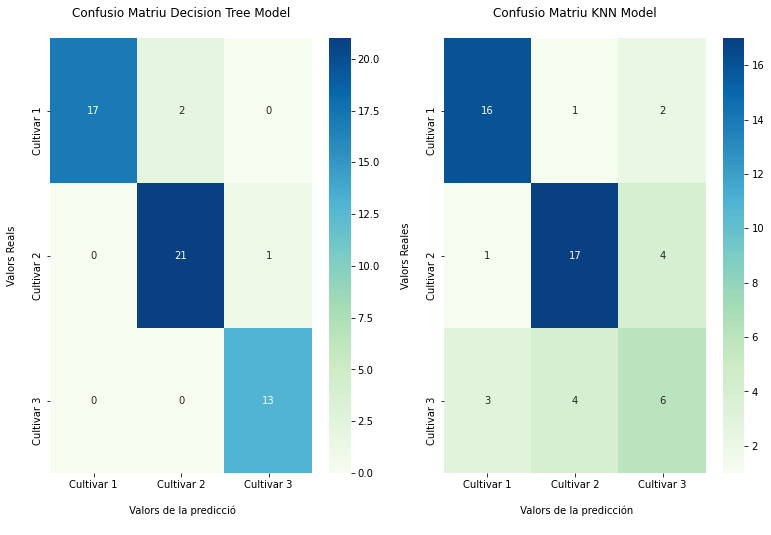

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

# Nombrem les clases de la variable objetiu per la matriu
cultivares = ['Cultivar 1','Cultivar 2','Cultivar 3']

plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_DT), columns=cultivares, index = cultivares)
fx = sns.heatmap(cm, annot=True, fmt='d',cmap="GnBu")
fx.set_title('Confusio Matriu Decision Tree Model\n')
fx.set_xlabel('\n Valors de la predicció\n')
fx.set_ylabel('Valors Reals\n')
print('');

plt.subplot(1,3,2)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_KNN), columns=cultivares, index = cultivares)
fx = sns.heatmap(cm, annot=True, fmt='d',cmap="GnBu")
fx.set_title('Confusio Matriu KNN Model\n')
fx.set_xlabel('\n Valors de la predicción\n')
fx.set_ylabel('Valors Reales\n')
print('');

Observem que el model amb més Veritables positius a la diagonal es al Decision Tree, amb el valor accuracy més alt\
També veiem que les classes Cultivar 1 i Cultivar 2 tenen en tots els models Veritables Positius alts, és la classe Cultivar 3 la que en el model KNN té molt pocs veritables positius, és la classe que fa que tinguin aquests models un accuracy tan baix .

In [28]:
precision_model = []
recall_model = []
f1_model = []

for y_pred in prediccions:
    precision=metrics.precision_score(y_test, y_pred, average='weighted')
    precision_model.append(precision)
    recall=metrics.recall_score(y_test, y_pred, average='weighted')
    recall_model.append(recall)
    f1=metrics.f1_score(y_test, y_pred, average='weighted')
    f1_model.append(f1)
    
df_accuracy['Precision'] = precision_model
df_accuracy['Recall'] = recall_model
df_accuracy['F1'] = f1_model

df_accuracy



,Accuracy,Precision,Recall,F1
Model Dec Tree,0.944444,0.947378,0.944444,0.944376
Model KNN,0.722222,0.716667,0.722222,0.719069


Altres mètriques.

Avaluarem els models amb altres mètriques que ens indiquen com de bé treballen quan necessitem a la classificació una precisó concreta:

**Precision**: proporció d'elements classificats com a positius correctament entre tots els elements classificats com a positius.\ 
**Recall o sensibilitat**: proporció d'elements classificats com a positius correctament entre tots els elements positius reals. \
**F1 score**: combina les mètriques Precision i Recall per donar un únic resultat. Aquesta mètrica és la més apropiada quan tenim conjunts de dades no balancejades. Es calcula com la mitjana harmònica de Precision i Recall, la mitjana harmònica fa que si una de les dues mesures és petita (encara que l'altra sigui màxima), el valor de F1 score serà petit.\
    Per a una classificació multiclasse calculem l'F1 de cada classe amb el mètode One-vs-Rest (OvR) en lloc d'una mitjana com a la classificació binària. Aquesta "mitjana" en el problema multiclasse necessita un paràmetre:\
**Macro Average**: mitjana aritmètica de cada classe, tracta totes les classes per igual independentment del nombre de registres que tingui cada classe, no apropiat per a classes desbalancejades,\
**Weighted Average**: pren la mitjana de cada classe tenint en compte la proporció del nombre de registres.

In [29]:
print('Modelo Decision Tree')
print(metrics.classification_report(y_test, y_pred_DT))
print('')

print('Modelo KNN')
print(metrics.classification_report(y_test, y_pred_KNN))
print('')

Modelo Decision Tree
              precision    recall  f1-score   support

           1       1.00      0.89      0.94        19
           2       0.91      0.95      0.93        22
           3       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54


Modelo KNN
              precision    recall  f1-score   support

           1       0.80      0.84      0.82        19
           2       0.77      0.77      0.77        22
           3       0.50      0.46      0.48        13

    accuracy                           0.72        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.72      0.72      0.72        54




A les mètriques per classe observem que Decision Tree tenen valors molt alts a totes les mètriques, per classe i les mitjanes. Tot i això, el altre  model te les mitjanes més baixes i observem que és pels resultats de la classe Cultivar 3.

# Exercici 3

* Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

In [30]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

**Modelo Decision Tree Classifier con GridSearch.**


In [31]:
dt_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [32]:
model_DT = DecisionTreeClassifier(random_state = 0)
params_DT = {'criterion': ['entropy','gini'], 'max_depth': [3,5,7], 'splitter' : ['best','random']}

GS_DT = GridSearchCV(estimator=model_DT, 
                      param_grid=params_DT, 
                      cv=cv_method,
                      verbose=1, 
                      scoring='accuracy',
                      return_train_score=True)

GS_DT.fit(X, y)  

Fitting 15 folds for each of 12 candidates, totalling 180 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=0),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [33]:
GS_DT.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'splitter': 'random'}

In [34]:
GS_DT.best_score_

0.9344444444444445

**Entrenem el model amb els paràmetres que hem obtingut.**

In [35]:
model_DT_BP = DecisionTreeClassifier(criterion='entropy',max_depth=7, splitter = 'random', random_state = 0)

model_DT_BP.fit(X_train, y_train)
model_DT_BP.score(X_test, y_test)

0.8703703703703703

In [36]:
y_pred_DT_BP = model_DT_BP.predict(X_test)

**Modelo Nearest Neighbor Classifier con GridSearch.**

In [37]:
knn_classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [38]:
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

model_KNN = KNeighborsClassifier()

params_KNN = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

GS_KNN_BP = GridSearchCV(estimator=model_KNN, 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1, 
                      scoring='accuracy',
                      return_train_score=True)

GS_KNN_BP.fit(X, y)  

Fitting 15 folds for each of 60 candidates, totalling 900 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=0),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21, 2),
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [39]:
GS_KNN_BP.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [40]:
GS_KNN_BP.best_score_

0.808994708994709

**Entrenem el model amb els paràmetres que hem obtingut.**

In [41]:
model_KNN_BP = KNeighborsClassifier(metric = 'manhattan', p=1, n_neighbors = 1, weights = 'uniform')

model_KNN_BP.fit(X_train, y_train)
model_KNN_BP.score(X_test, y_test)

0.8333333333333334

In [42]:
y_pred_KNN_BP = model_KNN_BP.predict(X_test)

**Calculem F1_weighted per a tots els models.**

In [43]:
y_pred_BP = [y_pred_DT_BP, y_pred_KNN_BP]
f1_model_BP = []
accuracy_model_BP = []

for y_pred in prediccions:
    f1=metrics.f1_score(y_test, y_pred, average='weighted')
    f1_model_BP.append(f1)
    accuracy=metrics.accuracy_score(y_test, y_pred)
    accuracy_model_BP.append(accuracy)

In [44]:
df_accuracy['Accuracy_BP'] = accuracy_model_BP
df_accuracy['F1_BP'] = f1_model_BP

In [45]:
df_accuracy

,Accuracy,Precision,Recall,F1,Accuracy_BP,F1_BP
Model Dec Tree,0.944444,0.947378,0.944444,0.944376,0.944444,0.944376
Model KNN,0.722222,0.716667,0.722222,0.719069,0.722222,0.719069


Aplicar els millors hiperparàmetres no ha suposat una millora en els models, ja tenien els hiperparàmetres ajustats per defecte.

# Exercici 4
**Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.**

In [48]:
from sklearn.model_selection import cross_val_score

model_DT_BP = DecisionTreeClassifier(criterion='entropy',max_depth=7, splitter = 'random', random_state = 0)
model_KNN_BP = KNeighborsClassifier(metric = 'manhattan', p=1, n_neighbors = 1, weights = 'uniform')
model_SVM_BP = SVC(C = 0.1, kernel = 'linear', gamma = 'scale')

models = [model_DT_BP,model_KNN_BP]
cv_f1_weighted = []

for model in models:
    cv_scores = cross_val_score(
                    estimator = model,  
                    X         = X, 
                    y         = y,
                    scoring   = 'f1_weighted',
                    cv        = cv_method  
                                 )
    cv_f1_weighted_mean = cv_scores.mean()
    cv_f1_weighted.append(cv_f1_weighted_mean)



In [49]:
cv_f1_weighted

[0.9344573711702113, 0.8028720923619515]

In [50]:
df_accuracy['F1_BP_CV'] = cv_f1_weighted

In [51]:
df_accuracy

,Accuracy,Precision,Recall,F1,Accuracy_BP,F1_BP,F1_BP_CV
Model Dec Tree,0.944444,0.947378,0.944444,0.944376,0.944444,0.944376,0.934457
Model KNN,0.722222,0.716667,0.722222,0.719069,0.722222,0.719069,0.802872



- El model Decision Tree no millora perquè es facin particions del dataset diferents, les variables són les mateixes i tenen la mateixa importància a l'hora de decidir l'arrel i l'ordre d'impotància dels nodes.
- El model KNN ha millorat, aprèn amb cada predicció pel que en entrenar-lo amb més dades millora les seves prediccions.



# Exercici 5
**Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)**


In [52]:
from scipy.stats import shapiro
def distribucion_normal(data):
    stat, p = shapiro(data)
    print('stat=%.3f, p-value=%.20f' % (stat, p))
    if p > 0.05:
        print('Acceptem la hipòtesi nul·la H0: Probablement Gaussiana')
    else:
        print('Rebutgem la hipòtesi nul·la H0, ens quedem amb l´alternativa H1: Probablement no Gaussiana')

In [53]:
X.columns

Index([' Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', ' Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [54]:


i=0
columns = [' Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', ' Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline']
for column in columns:
    print('Variable', columns[i])
    distribucion_normal(X[column])
    print('')
    i+=1;



Variable  Alcohol
stat=0.982, p-value=0.02005171775817871094
Rebutgem la hipòtesi nul·la H0, ens quedem amb l´alternativa H1: Probablement no Gaussiana

Variable Malic acid
stat=0.889, p-value=0.00000000029459296114
Rebutgem la hipòtesi nul·la H0, ens quedem amb l´alternativa H1: Probablement no Gaussiana

Variable Ash
stat=0.984, p-value=0.03868526220321655273
Rebutgem la hipòtesi nul·la H0, ens quedem amb l´alternativa H1: Probablement no Gaussiana

Variable Alcalinity of ash
stat=0.990, p-value=0.26386943459510803223
Acceptem la hipòtesi nul·la H0: Probablement Gaussiana

Variable  Magnesium
stat=0.938, p-value=0.00000063454160681431
Rebutgem la hipòtesi nul·la H0, ens quedem amb l´alternativa H1: Probablement no Gaussiana

Variable Total phenols
stat=0.977, p-value=0.00439575221389532089
Rebutgem la hipòtesi nul·la H0, ens quedem amb l´alternativa H1: Probablement no Gaussiana

Variable Flavanoids
stat=0.955, p-value=0.00001679063643678091
Rebutgem la hipòtesi nul·la H0, ens quedem

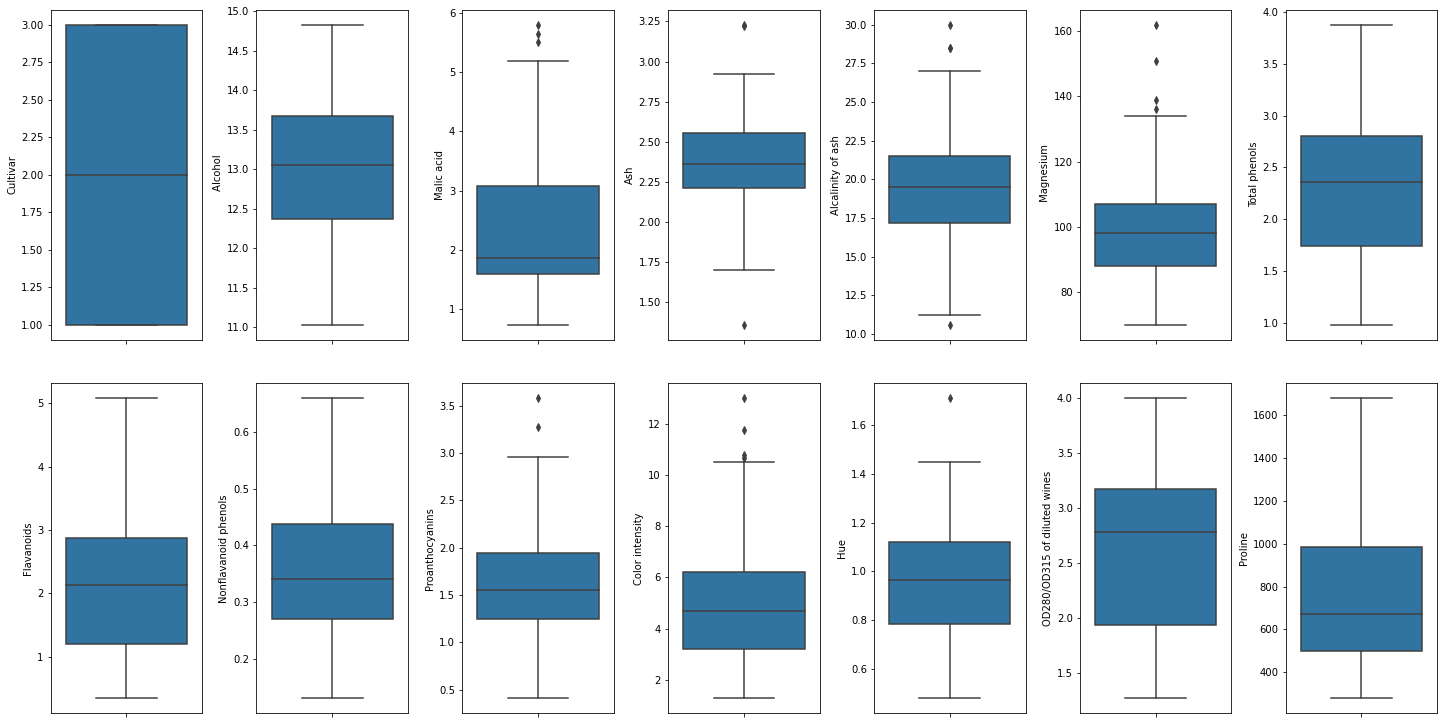

In [55]:
#checking outliers using boxplot
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
count = 0
axs = axs.flatten()
for tar,var in wine.items():
    sns.boxplot(y=tar, data=wine, ax=axs[count])
    count= count+1
plt.tight_layout(pad=0.5, w_pad=0.78, h_pad=4.0)

- Per a les variables amb distribució Gaussiana fem un StandardScaler.

In [56]:
from sklearn.preprocessing import StandardScaler
variablesStd = ['Alcalinity of ash']
ss = StandardScaler()
X[variablesStd] = ss.fit_transform(X[variablesStd])


- Per normalitzar les variables amb distribució no Gaussiana sense outliers fem un MinMaxScaler.

In [57]:
from sklearn.preprocessing import MinMaxScaler
variablesNorm = [' Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines','Proline']
mms = MinMaxScaler(feature_range = (0, 1))
X[variablesNorm] = mms.fit_transform(X[variablesNorm])

- Per a les variables amb outliers fem un RobustScaler.


In [58]:
from sklearn.preprocessing import RobustScaler
variablesRbSc = ['Malic acid','Ash', 'Alcalinity of ash',' Magnesium','Proanthocyanins' ,'Color intensity', 'Hue']
rs = RobustScaler()
X[variablesRbSc] = rs.fit_transform(X[variablesRbSc])


**Visualitzem les variables normalitzades**

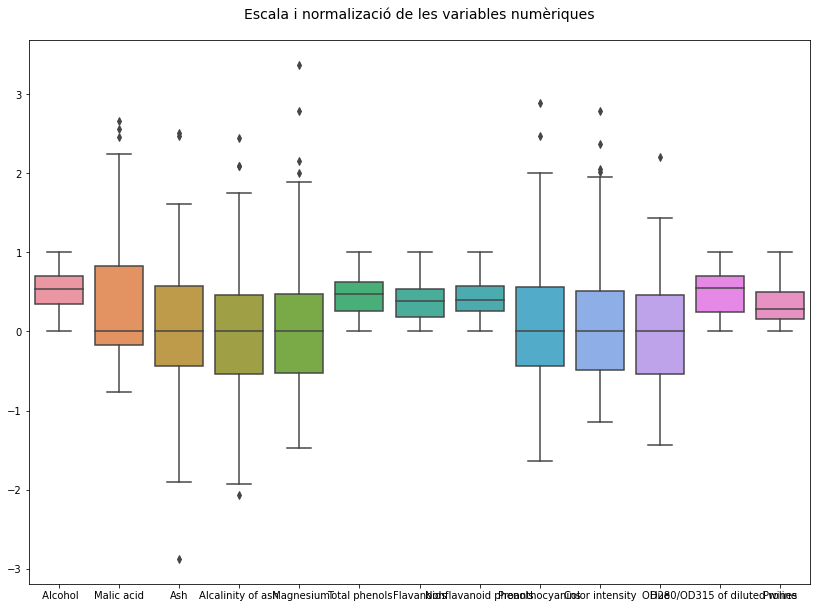

In [59]:
plt.figure(figsize=(14, 10))
sns.boxplot(data=X)
plt.title('Escala i normalizació de les variables numèriques\n', size = 14)
plt.show()


**Divisió del Dataset a Train i Test.**

In [60]:
X_train_FS, X_test_FS, y_train_FS, y_test_FS = train_test_split(X,y,test_size = 0.3,random_state=0, shuffle=True)
print(X_train_FS.shape, X_test_FS.shape, y_train_FS.shape, y_test_FS.shape)

(124, 13) (54, 13) (124,) (54,)


In [61]:
model_DT_PP = DecisionTreeClassifier(random_state = 0)
model_KNN_PP = KNeighborsClassifier()
models_PP = [model_DT_PP,model_KNN_PP]
f1_weighted_prep = []
for model in models_PP:
    model.fit(X_train_FS, y_train_FS)
    model.score(X_test_FS, y_test_FS)
    y_pred_model= model.predict(X_test_FS)
    f1=metrics.f1_score(y_test, y_pred_model, average='weighted')
    f1_weighted_prep.append(f1)

In [63]:
f1_weighted_prep

[0.9443758573388202, 0.9446177964696484]

In [64]:
df_accuracy['F1_prep'] = f1_weighted_prep
df_accuracy

,Accuracy,Precision,Recall,F1,Accuracy_BP,F1_BP,F1_BP_CV,F1_prep
Model Dec Tree,0.944444,0.947378,0.944444,0.944376,0.944444,0.944376,0.934457,0.944376
Model KNN,0.722222,0.716667,0.722222,0.719069,0.722222,0.719069,0.802872,0.944618


- El model Decision Tree no millora de manera destacada amb el preprocessat en ser un model no paramètric, com expliquem amb la validació creuada.
- El model KNN millora notablement, de 0,719 a 0,944, superant el F1 calculat amb els millors hiperparàmetres. És un model no paramètric que necessita tenir les variables a la mateixa escala perquè els mesuraments siguin efectius.